In [1]:
#import all the necessary liabraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, roc_auc_score,roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

from sklearn.tree import DecisionTreeClassifier,plot_tree

import warnings
warnings.filterwarnings("ignore")

In [2]:
#laod the dataset
df=pd.read_csv("diabetes.csv")
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


<AxesSubplot:>

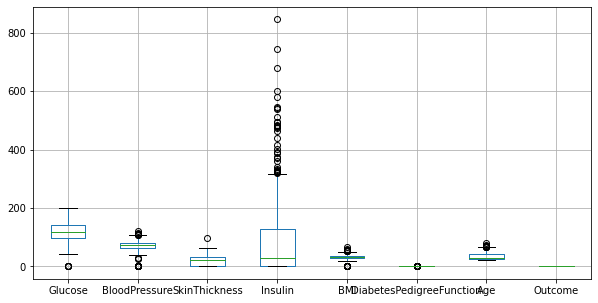

In [4]:
df.boxplot(figsize=(10,5))

In [5]:
np.sort(df["Insulin"].unique())

array([  0,  14,  15,  16,  18,  22,  23,  25,  29,  32,  36,  37,  38,
        40,  41,  42,  43,  44,  45,  46,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  63,  64,  65,  66,  67,
        68,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  81,  82,
        83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  94,  95,  96,
        99, 100, 105, 106, 108, 110, 112, 114, 115, 116, 119, 120, 122,
       125, 126, 127, 128, 129, 130, 132, 135, 140, 142, 144, 145, 146,
       148, 150, 152, 155, 156, 158, 159, 160, 165, 166, 167, 168, 170,
       171, 175, 176, 178, 180, 182, 183, 184, 185, 188, 190, 191, 192,
       193, 194, 196, 200, 204, 205, 207, 210, 215, 220, 225, 228, 230,
       231, 235, 237, 240, 245, 249, 250, 255, 258, 265, 270, 271, 272,
       274, 275, 277, 278, 280, 284, 285, 291, 293, 300, 304, 310, 318,
       321, 325, 326, 328, 330, 335, 342, 360, 370, 375, 387, 392, 402,
       415, 440, 465, 474, 478, 480, 485, 495, 510, 540, 543, 54

In [6]:
#seems like we have extreme outliers after 600 causing major impact on the accuracy
#hence droping the observation with extrem outliears
df.drop(np.where(df["Insulin"]>600)[0].tolist(),axis=0,inplace=True)

In [7]:
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [8]:
df["Outcome"].value_counts()#Data set is imbalanced

0    498
1    267
Name: Outcome, dtype: int64

In [9]:
#splitting the dataset
x=df.drop("Outcome", axis=1)
y=df["Outcome"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=98,stratify=y)

In [10]:
x_train.head(3)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
484,145,0,0,0,44.2,0.630,31
562,87,68,34,77,37.6,0.401,24
718,108,60,46,178,35.5,0.415,24


In [11]:
x_test.head(3)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
401,137,61,0,0,24.2,0.151,55
316,99,80,11,64,19.3,0.284,30
592,132,80,0,0,34.4,0.402,44


In [12]:
y_train.head(3)

484    1
562    0
718    0
Name: Outcome, dtype: int64

In [13]:
y_test.head(3)

401    0
316    0
592    1
Name: Outcome, dtype: int64

In [14]:
#Logistic Regression 
logreg=LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression()

In [15]:
#Testing model accuracy for logistic Regression
y_pred=logreg.predict(x_test)
cnf_m=confusion_matrix(y_test, y_pred)
print("Testing confusion matrix for logistic\n",cnf_m)
print()
acc= accuracy_score(y_test, y_pred)
print("Testing acurracy",acc)
print()
clf_report=classification_report(y_test, y_pred)
print(clf_report)

Testing confusion matrix for logistic
 [[91  9]
 [28 25]]

Testing acurracy 0.7581699346405228

              precision    recall  f1-score   support

           0       0.76      0.91      0.83       100
           1       0.74      0.47      0.57        53

    accuracy                           0.76       153
   macro avg       0.75      0.69      0.70       153
weighted avg       0.75      0.76      0.74       153



In [16]:
#Training model accuracy for logistic model
y_pred_train=logreg.predict(x_train)
cnf_m=confusion_matrix(y_train, y_pred_train)
print("Traing confusion matrix for logistic\n",cnf_m)
print()
acc= accuracy_score(y_train, y_pred_train)
print("Traing acurracy",acc)
print()
clf_report=classification_report(y_train, y_pred_train)
print(clf_report)

Traing confusion matrix for logistic
 [[350  48]
 [ 86 128]]

Traing acurracy 0.7810457516339869

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       398
           1       0.73      0.60      0.66       214

    accuracy                           0.78       612
   macro avg       0.77      0.74      0.75       612
weighted avg       0.78      0.78      0.78       612



#### KNN

In [17]:
knn_mod=KNeighborsClassifier()
knn_mod.fit(x_train, y_train)

KNeighborsClassifier()

In [18]:
#Testing model accuracy for KNN 
y_pred=knn_mod.predict(x_test)
cnf_m=confusion_matrix(y_test, y_pred)
print("Testing confusion matrix for KNN\n",cnf_m)
print()
acc= accuracy_score(y_test, y_pred)
print("Testing acurracy",acc)
print()
clf_report=classification_report(y_test, y_pred)
print(clf_report)

Testing confusion matrix for KNN
 [[79 21]
 [32 21]]

Testing acurracy 0.6535947712418301

              precision    recall  f1-score   support

           0       0.71      0.79      0.75       100
           1       0.50      0.40      0.44        53

    accuracy                           0.65       153
   macro avg       0.61      0.59      0.60       153
weighted avg       0.64      0.65      0.64       153



In [19]:
#Training model accuracy for logistic model
y_pred_train=knn_mod.predict(x_train)
cnf_m=confusion_matrix(y_train, y_pred_train)
print("Traing confusion matrix for KNN\n",cnf_m)
print()
acc= accuracy_score(y_train, y_pred_train)
print("Traing acurracy",acc)
print()
clf_report=classification_report(y_train, y_pred_train)
print(clf_report)

Traing confusion matrix for KNN
 [[350  48]
 [ 61 153]]

Traing acurracy 0.8218954248366013

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       398
           1       0.76      0.71      0.74       214

    accuracy                           0.82       612
   macro avg       0.81      0.80      0.80       612
weighted avg       0.82      0.82      0.82       612



#### Decision Tree

In [20]:
dt_clf=DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [21]:
#Testing model accuracy for Decision Tree 
y_pred=dt_clf.predict(x_test)
cnf_m=confusion_matrix(y_test, y_pred)
print("Testing confusion matrix for KNN\n",cnf_m)
print()
acc= accuracy_score(y_test, y_pred)
print("Testing acurracy",acc)
print()
clf_report=classification_report(y_test, y_pred)
print(clf_report)

Testing confusion matrix for KNN
 [[78 22]
 [31 22]]

Testing acurracy 0.6535947712418301

              precision    recall  f1-score   support

           0       0.72      0.78      0.75       100
           1       0.50      0.42      0.45        53

    accuracy                           0.65       153
   macro avg       0.61      0.60      0.60       153
weighted avg       0.64      0.65      0.64       153



In [22]:
#Training model accuracy for logistic model
y_pred_train=dt_clf.predict(x_train)
cnf_m=confusion_matrix(y_train, y_pred_train)
print("Traing confusion matrix for KNN\n",cnf_m)
print()
acc= accuracy_score(y_train, y_pred_train)
print("Traing acurracy",acc)
print()
clf_report=classification_report(y_train, y_pred_train)
print(clf_report)

Traing confusion matrix for KNN
 [[398   0]
 [  0 214]]

Traing acurracy 1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       398
           1       1.00      1.00      1.00       214

    accuracy                           1.00       612
   macro avg       1.00      1.00      1.00       612
weighted avg       1.00      1.00      1.00       612



In [23]:
#Decision Tree pruning

decision_tree_model = DecisionTreeClassifier(random_state=10)
decision_tree_model

DecisionTreeClassifier(random_state=10)

In [24]:
result = decision_tree_model.cost_complexity_pruning_path(x_train,y_train)
ccp_alpha_list = result['ccp_alphas']
ccp_alpha_list=list(ccp_alpha_list)
ccp_alpha_list

[0.0,
 0.0013071895424836598,
 0.0013616557734204794,
 0.0014524328249818446,
 0.0014854426619132504,
 0.0014854426619132504,
 0.0014978213507625274,
 0.0014978213507625274,
 0.001547987616099072,
 0.0015522875816993459,
 0.001560434240172803,
 0.0015629440181869853,
 0.001607632300231921,
 0.001702069716775599,
 0.001827485380116959,
 0.0018619106916451164,
 0.00196078431372549,
 0.00196078431372549,
 0.00196078431372549,
 0.001963926596279537,
 0.0019845995078193214,
 0.0020948550360315077,
 0.0021786492374727667,
 0.0021786492374727667,
 0.0021786492374727675,
 0.0022912969880406198,
 0.0023334981425555245,
 0.0024076549811843932,
 0.0024509803921568627,
 0.0024509803921568627,
 0.002475737769855417,
 0.002475737769855417,
 0.0025374855824682814,
 0.0025568869523117897,
 0.0026143790849673196,
 0.0026143790849673205,
 0.002712635246975797,
 0.0027233115468409588,
 0.002801120448179272,
 0.00283191737464601,
 0.002942910143721498,
 0.003000420441080915,
 0.0030165912518853684,
 0.003

In [25]:
train_accuracy_list = []
test_accuracy_list = []
for ccp_alpha in ccp_alpha_list:
    #print(ccp_alpha)
    dt_clf = DecisionTreeClassifier(random_state=10,ccp_alpha=ccp_alpha)
    dt_clf.fit(x_train,y_train)
    train_accuracy_list.append(dt_clf.score(x_train,y_train))
    test_accuracy_list.append(dt_clf.score(x_test,y_test))
    
train_accuracy_list
test_accuracy_list

[0.6797385620915033,
 0.6797385620915033,
 0.6797385620915033,
 0.6797385620915033,
 0.6862745098039216,
 0.6862745098039216,
 0.6797385620915033,
 0.6797385620915033,
 0.6797385620915033,
 0.6862745098039216,
 0.6928104575163399,
 0.6862745098039216,
 0.6928104575163399,
 0.6862745098039216,
 0.6862745098039216,
 0.6862745098039216,
 0.6862745098039216,
 0.6862745098039216,
 0.6862745098039216,
 0.6993464052287581,
 0.6993464052287581,
 0.7058823529411765,
 0.7058823529411765,
 0.7058823529411765,
 0.7058823529411765,
 0.6862745098039216,
 0.6862745098039216,
 0.6993464052287581,
 0.6928104575163399,
 0.6928104575163399,
 0.6928104575163399,
 0.6928104575163399,
 0.6928104575163399,
 0.6928104575163399,
 0.6928104575163399,
 0.6928104575163399,
 0.6928104575163399,
 0.6928104575163399,
 0.6862745098039216,
 0.6928104575163399,
 0.6993464052287581,
 0.6993464052287581,
 0.6993464052287581,
 0.6993464052287581,
 0.6993464052287581,
 0.6993464052287581,
 0.6993464052287581,
 0.7058823529

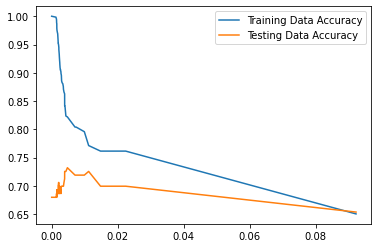

In [26]:
fig,ax = plt.subplots()
ax.plot(ccp_alpha_list,train_accuracy_list,label= "Training Data Accuracy")
ax.plot(ccp_alpha_list,test_accuracy_list,label = "Testing Data Accuracy")
ax.legend()

In [27]:
np.where(test_accuracy_list == np.max(test_accuracy_list))

(array([52], dtype=int64),)

In [28]:
test_accuracy_list[52]

0.7320261437908496

In [29]:
ccp_alpha_list[52]

0.004769921436588095

In [30]:
train_accuracy_list[52]

0.8218954248366013

In [31]:
decision_tree_model = DecisionTreeClassifier(random_state=10,ccp_alpha=ccp_alpha_list[52])
decision_tree_model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.004769921436588095, random_state=10)

In [32]:
#Testing model accuracy for Decision Tree after prunning
y_pred=decision_tree_model.predict(x_test)
cnf_m=confusion_matrix(y_test, y_pred)
print("Testing confusion matrix for DT-prunning\n",cnf_m)
print()
acc= accuracy_score(y_test, y_pred)
print("Testing acurracy",acc)
print()
clf_report=classification_report(y_test, y_pred)
print(clf_report)

Testing confusion matrix for DT-prunning
 [[88 12]
 [29 24]]

Testing acurracy 0.7320261437908496

              precision    recall  f1-score   support

           0       0.75      0.88      0.81       100
           1       0.67      0.45      0.54        53

    accuracy                           0.73       153
   macro avg       0.71      0.67      0.68       153
weighted avg       0.72      0.73      0.72       153



In [33]:
#Training model accuracy for logistic model
y_pred_train=decision_tree_model.predict(x_train)
cnf_m=confusion_matrix(y_train, y_pred_train)
print("Traing confusion matrix for DT-prunning\n",cnf_m)
print()
acc= accuracy_score(y_train, y_pred_train)
print("Traing acurracy",acc)
print()
clf_report=classification_report(y_train, y_pred_train)
print(clf_report)

Traing confusion matrix for DT-prunning
 [[366  32]
 [ 77 137]]

Traing acurracy 0.8218954248366013

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       398
           1       0.81      0.64      0.72       214

    accuracy                           0.82       612
   macro avg       0.82      0.78      0.79       612
weighted avg       0.82      0.82      0.82       612



#### Random Forest Dataset

In [34]:
rf_clf=RandomForestClassifier()
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [35]:
#Testing model accuracy for Random Forest 
y_pred=rf_clf.predict(x_test)
cnf_m=confusion_matrix(y_test, y_pred)
print("Testing confusion matrix for RF\n",cnf_m)
print()
acc= accuracy_score(y_test, y_pred)
print("Testing acurracy",acc)
print()
clf_report=classification_report(y_test, y_pred)
print(clf_report)

Testing confusion matrix for RF
 [[90 10]
 [25 28]]

Testing acurracy 0.7712418300653595

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       100
           1       0.74      0.53      0.62        53

    accuracy                           0.77       153
   macro avg       0.76      0.71      0.73       153
weighted avg       0.77      0.77      0.76       153



In [36]:
#Training model accuracy for logistic model
y_pred_train=rf_clf.predict(x_train)
cnf_m=confusion_matrix(y_train, y_pred_train)
print("Traing confusion matrix for RF\n",cnf_m)
print()
acc= accuracy_score(y_train, y_pred_train)
print("Traing acurracy",acc)
print()
clf_report=classification_report(y_train, y_pred_train)
print(clf_report)

Traing confusion matrix for RF
 [[398   0]
 [  0 214]]

Traing acurracy 1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       398
           1       1.00      1.00      1.00       214

    accuracy                           1.00       612
   macro avg       1.00      1.00      1.00       612
weighted avg       1.00      1.00      1.00       612



#### Adaboost Classifier

In [37]:
adb_model=AdaBoostClassifier()
adb_model.fit(x_train,y_train)

AdaBoostClassifier()

In [38]:
#Testing model accuracy for Random Forest 
y_pred=rf_clf.predict(x_test)
cnf_m=confusion_matrix(y_test, y_pred)
print("Testing confusion matrix for DT-prunning\n",cnf_m)
print()
acc= accuracy_score(y_test, y_pred)
print("Testing acurracy",acc)
print()
clf_report=classification_report(y_test, y_pred)
print(clf_report)

Testing confusion matrix for DT-prunning
 [[90 10]
 [25 28]]

Testing acurracy 0.7712418300653595

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       100
           1       0.74      0.53      0.62        53

    accuracy                           0.77       153
   macro avg       0.76      0.71      0.73       153
weighted avg       0.77      0.77      0.76       153



In [39]:
#Training model accuracy for logistic model
y_pred_train=rf_clf.predict(x_train)
cnf_m=confusion_matrix(y_train, y_pred_train)
print("Traing confusion matrix for DT-prunning\n",cnf_m)
print()
acc= accuracy_score(y_train, y_pred_train)
print("Traing acurracy",acc)
print()
clf_report=classification_report(y_train, y_pred_train)
print(clf_report)

Traing confusion matrix for DT-prunning
 [[398   0]
 [  0 214]]

Traing acurracy 1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       398
           1       1.00      1.00      1.00       214

    accuracy                           1.00       612
   macro avg       1.00      1.00      1.00       612
weighted avg       1.00      1.00      1.00       612



In [40]:
# Checking the values after normalization

In [41]:
x

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,50,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,52
3,150,66,23,94,28.1,0.167,21
4,150,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63
764,122,70,27,0,36.8,0.340,27
765,121,72,23,112,26.2,0.245,30
766,126,60,0,0,30.1,0.349,47


In [42]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 765, dtype: int64

In [43]:
df1=df

In [44]:
x1=df1.drop("Outcome", axis=1)
y1=df1["Outcome"]
x1.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,50,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,52
3,150,66,23,94,28.1,0.167,21
4,150,40,35,168,43.1,2.288,33


In [45]:
#Normalizing the data
nr_scale=MinMaxScaler()
array=nr_scale.fit_transform(x1)
x1_nr=pd.DataFrame(array, columns=x1.columns)
x1_nr.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.743719,0.409836,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.516667
3,0.753769,0.540984,0.232323,0.156667,0.418778,0.038002,0.000000
4,0.753769,0.327869,0.353535,0.280000,0.642325,0.943638,0.200000


In [46]:
y1.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x1_nr,y1, random_state=45, stratify=y1, test_size=0.2)

In [48]:
x_train

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
109,0.859296,0.590164,0.333333,0.225000,0.496274,0.051665,0.050000
507,0.422111,0.590164,0.313131,0.000000,0.442623,0.093510,0.416667
452,0.879397,0.508197,0.303030,0.000000,0.500745,0.057216,0.283333
540,0.422111,0.737705,0.232323,0.093333,0.588674,0.034586,0.066667
20,0.497487,0.688525,0.000000,0.000000,0.527571,0.132365,0.483333
...,...,...,...,...,...,...,...
224,0.437186,0.639344,0.272727,0.053333,0.515648,0.009821,0.016667
752,0.643216,0.721311,0.393939,0.183333,0.543964,0.418019,0.266667
522,0.437186,0.491803,0.181818,0.000000,0.324888,0.156277,0.000000
260,0.713568,0.655738,0.151515,0.000000,0.482861,0.052092,0.700000


In [49]:
y_train

110    1
510    1
455    1
543    0
21     0
      ..
225    0
755    1
525    0
263    0
741    0
Name: Outcome, Length: 612, dtype: int64

In [50]:
#Logistic Regression 
logreg=LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression()

In [51]:
#Testing model accuracy for logistic Regression
y_pred=logreg.predict(x_test)
cnf_m=confusion_matrix(y_test, y_pred)
print("Testing confusion matrix for logistic\n",cnf_m)
print()
acc= accuracy_score(y_test, y_pred)
print("Testing acurracy",acc)
print()
clf_report=classification_report(y_test, y_pred)
print(clf_report)

Testing confusion matrix for logistic
 [[90 10]
 [24 29]]

Testing acurracy 0.7777777777777778

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       100
           1       0.74      0.55      0.63        53

    accuracy                           0.78       153
   macro avg       0.77      0.72      0.74       153
weighted avg       0.77      0.78      0.77       153



In [52]:
#Training model accuracy for logistic model
y_pred_train=logreg.predict(x_train)
cnf_m=confusion_matrix(y_train, y_pred_train)
print("Traing confusion matrix for logistic\n",cnf_m)
print()
acc= accuracy_score(y_train, y_pred_train)
print("Traing acurracy",acc)
print()
clf_report=classification_report(y_train, y_pred_train)
print(clf_report)

Traing confusion matrix for logistic
 [[361  37]
 [105 109]]

Traing acurracy 0.7679738562091504

              precision    recall  f1-score   support

           0       0.77      0.91      0.84       398
           1       0.75      0.51      0.61       214

    accuracy                           0.77       612
   macro avg       0.76      0.71      0.72       612
weighted avg       0.76      0.77      0.76       612



In [53]:
knn_mod=KNeighborsClassifier()
knn_mod.fit(x_train, y_train)

KNeighborsClassifier()

In [54]:
#Testing model accuracy for knn_mod Regression
y_pred=knn_mod.predict(x_test)
cnf_m=confusion_matrix(y_test, y_pred)
print("Testing confusion matrix for knn_mod\n",cnf_m)
print()
acc= accuracy_score(y_test, y_pred)
print("Testing acurracy",acc)
print()
clf_report=classification_report(y_test, y_pred)
print(clf_report)

Testing confusion matrix for knn_mod
 [[81 19]
 [24 29]]

Testing acurracy 0.7189542483660131

              precision    recall  f1-score   support

           0       0.77      0.81      0.79       100
           1       0.60      0.55      0.57        53

    accuracy                           0.72       153
   macro avg       0.69      0.68      0.68       153
weighted avg       0.71      0.72      0.72       153



In [55]:
#Training model accuracy for logistic model
y_pred_train=knn_mod.predict(x_train)
cnf_m=confusion_matrix(y_train, y_pred_train)
print("Traing confusion matrix for knn_mod\n",cnf_m)
print()
acc= accuracy_score(y_train, y_pred_train)
print("Traing acurracy",acc)
print()
clf_report=classification_report(y_train, y_pred_train)
print(clf_report)

Traing confusion matrix for knn_mod
 [[351  47]
 [ 62 152]]

Traing acurracy 0.8218954248366013

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       398
           1       0.76      0.71      0.74       214

    accuracy                           0.82       612
   macro avg       0.81      0.80      0.80       612
weighted avg       0.82      0.82      0.82       612



#### Hyperparmeter tunning for KNN

In [56]:
#Hyperparameter tunning
knn_mod=KNeighborsClassifier()

hyperparameter={"n_neighbors":np.arange(3,30),"p":[1,2]}

gscv_knn_clf=GridSearchCV(knn_mod, hyperparameter, cv=5)

gscv_knn_clf.fit(x_train,y_train)
gscv_knn_clf.best_estimator_

KNeighborsClassifier(n_neighbors=19, p=1)

In [57]:
gscv_knn_clf.best_params_


{'n_neighbors': 19, 'p': 1}

In [58]:
#Testing model accuracy after hyperparameter tunning
knn_mod=gscv_knn_clf.best_estimator_
y_pred=knn_mod.predict(x_test)
cnf_m=confusion_matrix(y_test, y_pred)
print("Testing confusion matrix \n",cnf_m)
print()
acc= accuracy_score(y_test, y_pred)
print("Testing acurracy",acc)
print()
clf_report=classification_report(y_test, y_pred)
print(clf_report)

Testing confusion matrix 
 [[85 15]
 [26 27]]

Testing acurracy 0.7320261437908496

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       100
           1       0.64      0.51      0.57        53

    accuracy                           0.73       153
   macro avg       0.70      0.68      0.69       153
weighted avg       0.72      0.73      0.72       153



In [59]:
#Training model accuracy after hyperparameter tunning
knn_mod=gscv_knn_clf.best_estimator_
y_pred_train=knn_mod.predict(x_train)
cnf_m=confusion_matrix(y_train, y_pred_train)
print("Traing confusion matrix \n",cnf_m)
print()
acc= accuracy_score(y_train, y_pred_train)
print("Traing acurracy",acc)
print()
clf_report=classification_report(y_train, y_pred_train)
print(clf_report)

Traing confusion matrix 
 [[358  40]
 [ 82 132]]

Traing acurracy 0.8006535947712419

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       398
           1       0.77      0.62      0.68       214

    accuracy                           0.80       612
   macro avg       0.79      0.76      0.77       612
weighted avg       0.80      0.80      0.79       612



In [60]:
x_train

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
109,0.859296,0.590164,0.333333,0.225000,0.496274,0.051665,0.050000
507,0.422111,0.590164,0.313131,0.000000,0.442623,0.093510,0.416667
452,0.879397,0.508197,0.303030,0.000000,0.500745,0.057216,0.283333
540,0.422111,0.737705,0.232323,0.093333,0.588674,0.034586,0.066667
20,0.497487,0.688525,0.000000,0.000000,0.527571,0.132365,0.483333
...,...,...,...,...,...,...,...
224,0.437186,0.639344,0.272727,0.053333,0.515648,0.009821,0.016667
752,0.643216,0.721311,0.393939,0.183333,0.543964,0.418019,0.266667
522,0.437186,0.491803,0.181818,0.000000,0.324888,0.156277,0.000000
260,0.713568,0.655738,0.151515,0.000000,0.482861,0.052092,0.700000


In [61]:
#Decision Tress after normalization and hyperparameter
dt_clf=DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [62]:
#Testing model accuracy for Decision Tree without normalization
y_pred=dt_clf.predict(x_test)

cnf_m=confusion_matrix(y_test, y_pred)
print("Testing confusion matrix Decison Tree\n",cnf_m)

print()

acc= accuracy_score(y_test, y_pred)
print("Testing acurracy",acc)

print()

clf_report=classification_report(y_test, y_pred)

print(clf_report)

Testing confusion matrix Decison Tree
 [[80 20]
 [23 30]]

Testing acurracy 0.7189542483660131

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       100
           1       0.60      0.57      0.58        53

    accuracy                           0.72       153
   macro avg       0.69      0.68      0.69       153
weighted avg       0.72      0.72      0.72       153



In [63]:
#Training model accuracy
y_pred_train=dt_clf.predict(x_train)

cnf_m=confusion_matrix(y_train, y_pred_train)
print("Traing confusion matrix \n",cnf_m)
print()
acc= accuracy_score(y_train, y_pred_train)
print("Traing acurracy",acc)
print()
clf_report=classification_report(y_train, y_pred_train)
print(clf_report)

Traing confusion matrix 
 [[398   0]
 [  0 214]]

Traing acurracy 1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       398
           1       1.00      1.00      1.00       214

    accuracy                           1.00       612
   macro avg       1.00      1.00      1.00       612
weighted avg       1.00      1.00      1.00       612



In [64]:
#Decsion tree prunning

In [65]:
#pruning

decision_tree_model = DecisionTreeClassifier(random_state=10)
decision_tree_model

DecisionTreeClassifier(random_state=10)

In [66]:
result = decision_tree_model.cost_complexity_pruning_path(x_train,y_train)
ccp_alpha_list = result['ccp_alphas']
ccp_alpha_list=list(ccp_alpha_list)
ccp_alpha_list

[0.0,
 0.0014297385620915032,
 0.0014524328249818446,
 0.001470588235294118,
 0.001470588235294118,
 0.0014978213507625274,
 0.0014978213507625274,
 0.0015378700499807769,
 0.0015686274509803917,
 0.0016339869281045752,
 0.0019238878347037738,
 0.0021319638966697785,
 0.0021786492374727667,
 0.0021786492374727667,
 0.0021786492374727667,
 0.0021786492374727667,
 0.002205882352941176,
 0.00232389251997095,
 0.0024509803921568627,
 0.0024509803921568627,
 0.0024509803921568627,
 0.0024898848428260194,
 0.0024898848428260194,
 0.0025398156886046164,
 0.002548241518829754,
 0.002567693744164333,
 0.002567693744164333,
 0.0026455026455026454,
 0.00267224945533769,
 0.0026737967914438505,
 0.0027233115468409588,
 0.0027482691189683432,
 0.0027704064081773092,
 0.002782904011277713,
 0.002801120448179272,
 0.0029123955436415935,
 0.0031625553447185307,
 0.0032594856124267824,
 0.003399543890547626,
 0.003404139433551198,
 0.0034300757339973016,
 0.0034749455337690634,
 0.003932895366105353,
 

In [67]:
train_accuracy_list = []
test_accuracy_list = []
for ccp_alpha in ccp_alpha_list:
    #print(ccp_alpha)
    dt_clf = DecisionTreeClassifier(random_state=10,ccp_alpha=ccp_alpha)
    dt_clf.fit(x_train,y_train)
    train_accuracy_list.append(dt_clf.score(x_train,y_train))
    test_accuracy_list.append(dt_clf.score(x_test,y_test))
    
train_accuracy_list
test_accuracy_list

[0.7124183006535948,
 0.7124183006535948,
 0.7124183006535948,
 0.7189542483660131,
 0.7189542483660131,
 0.7189542483660131,
 0.7189542483660131,
 0.7254901960784313,
 0.7254901960784313,
 0.7320261437908496,
 0.7320261437908496,
 0.7450980392156863,
 0.738562091503268,
 0.738562091503268,
 0.738562091503268,
 0.738562091503268,
 0.738562091503268,
 0.7320261437908496,
 0.7320261437908496,
 0.7320261437908496,
 0.7320261437908496,
 0.7320261437908496,
 0.7320261437908496,
 0.7254901960784313,
 0.7320261437908496,
 0.7254901960784313,
 0.7254901960784313,
 0.7320261437908496,
 0.738562091503268,
 0.738562091503268,
 0.738562091503268,
 0.738562091503268,
 0.738562091503268,
 0.7516339869281046,
 0.7516339869281046,
 0.7516339869281046,
 0.7516339869281046,
 0.7516339869281046,
 0.7581699346405228,
 0.7516339869281046,
 0.7647058823529411,
 0.7647058823529411,
 0.7647058823529411,
 0.7712418300653595,
 0.7712418300653595,
 0.7777777777777778,
 0.7516339869281046,
 0.7516339869281046,
 0

In [68]:
np.where(test_accuracy_list == np.max(test_accuracy_list))

(array([56, 57], dtype=int64),)

In [69]:
test_accuracy_list[56]

0.7908496732026143

In [70]:
ccp_alpha_list[56]

0.011203983217458198

In [71]:
train_accuracy_list[56]

0.7679738562091504

In [72]:
decision_tree_model = DecisionTreeClassifier(random_state=10,ccp_alpha=ccp_alpha_list[53])
decision_tree_model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.008412114845938373, random_state=10)

In [73]:
#Testing Data Accurcay

y_pred = decision_tree_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy :",accuracy)

clf_report = classification_report(y_test,y_pred)
print("classification Report:\n",clf_report)

Confusion Matrix :
 [[79 21]
 [14 39]]
Accuracy : 0.7712418300653595
classification Report:
               precision    recall  f1-score   support

           0       0.85      0.79      0.82       100
           1       0.65      0.74      0.69        53

    accuracy                           0.77       153
   macro avg       0.75      0.76      0.75       153
weighted avg       0.78      0.77      0.77       153



In [74]:
#Training Data Accurcay

y_pred_train = decision_tree_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy :",accuracy)

clf_report = classification_report(y_train,y_pred_train)
print("classification Report:\n",clf_report)

Confusion Matrix :
 [[311  87]
 [ 45 169]]
Accuracy : 0.7843137254901961
classification Report:
               precision    recall  f1-score   support

           0       0.87      0.78      0.82       398
           1       0.66      0.79      0.72       214

    accuracy                           0.78       612
   macro avg       0.77      0.79      0.77       612
weighted avg       0.80      0.78      0.79       612



In [75]:
# #hyperparameter for DT
# dt_clf = DecisionTreeClassifier()

# hyperparameter = {"criterion":['gini',"entropy"],
#     "max_depth":np.arange(3,8),
#     "min_samples_split":np.arange(2,20),
#     "min_samples_leaf":np.arange(2,15)}

# gscv_dt_clf = GridSearchCV(dt_clf,hyperparameter,cv = 5)
# gscv_dt_clf.fit(x_train,y_train)

In [76]:
# gscv_dt_clf.best_estimator_

In [77]:
# #Testing Data evaluation after Hyperparameter Tuning

# dt_clf = gscv_dt_clf.best_estimator_

# y_pred = dt_clf.predict(x_test)

# cnf_matrix = confusion_matrix(y_test,y_pred)
# print("Confusion Matrix :\n",cnf_matrix)

# accuracy = accuracy_score(y_test,y_pred)
# print("Accuracy :",accuracy)

# clf_report = classification_report(y_test,y_pred)
# print("classification Report:\n",clf_report)

In [78]:
#Training Data evaluation after Hyperparameter Tuning

# #dt_clf = DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=11)

# dt_clf = gscv_dt_clf.best_estimator_

# y_pred_train = dt_clf.predict(x_train)

# cnf_matrix = confusion_matrix(y_train,y_pred_train)
# print("Confusion Matrix :\n",cnf_matrix)

# accuracy = accuracy_score(y_train,y_pred_train)
# print("Accuracy :",accuracy)

# clf_report = classification_report(y_train,y_pred_train)
# print("classification Report:\n",clf_report)

### RF on normailzed data

In [79]:
rf_clf=RandomForestClassifier()
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [80]:
#Testing Data Accurcay

y_pred = rf_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy :",accuracy)

clf_report = classification_report(y_test,y_pred)
print("classification Report:\n",clf_report)

Confusion Matrix :
 [[85 15]
 [18 35]]
Accuracy : 0.7843137254901961
classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       100
           1       0.70      0.66      0.68        53

    accuracy                           0.78       153
   macro avg       0.76      0.76      0.76       153
weighted avg       0.78      0.78      0.78       153



In [81]:
#Training Data Accurcay
y_pred_train = rf_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy :",accuracy)

clf_report = classification_report(y_train,y_pred_train)
print("classification Report:\n",clf_report)

Confusion Matrix :
 [[398   0]
 [  0 214]]
Accuracy : 1.0
classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       398
           1       1.00      1.00      1.00       214

    accuracy                           1.00       612
   macro avg       1.00      1.00      1.00       612
weighted avg       1.00      1.00      1.00       612



In [82]:
rf_clf = RandomForestClassifier()

hyperparameters = {'n_estimators':np.arange(10,100),
                    'criterion':['gini','entropy'],
                    'max_depth':np.arange(3,8),  
                    'min_samples_split':np.arange(4,20),
                    'min_samples_leaf':np.arange(3,10),
                    'random_state':[11],
                    'oob_score':[True],
                  'max_features':['auto']}

rscv_rf_model = RandomizedSearchCV(rf_clf,hyperparameters,cv = 7) 
rscv_rf_model.fit(x_train,y_train)

RandomizedSearchCV(cv=7, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([3, 4, 5, 6, 7]),
                                        'max_features': ['auto'],
                                        'min_samples_leaf': array([3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
       95, 96, 97, 98, 99]),
                                        'oob_score': [True],
                                        'random_state': [11]})

In [83]:
rscv_rf_model.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=5, max_features='auto',
                       min_samples_leaf=4, min_samples_split=6, n_estimators=15,
                       oob_score=True, random_state=11)

In [84]:
rf_clf = rscv_rf_model.best_estimator_
rf_clf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, max_features='auto',
                       min_samples_leaf=4, min_samples_split=6, n_estimators=15,
                       oob_score=True, random_state=11)

In [85]:
#Testing Data Accurcay

y_pred = rf_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy :",accuracy)

clf_report = classification_report(y_test,y_pred)
print("classification Report:\n",clf_report)

Confusion Matrix :
 [[89 11]
 [22 31]]
Accuracy : 0.7843137254901961
classification Report:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84       100
           1       0.74      0.58      0.65        53

    accuracy                           0.78       153
   macro avg       0.77      0.74      0.75       153
weighted avg       0.78      0.78      0.78       153



In [86]:
#Training Data Accurcay
rf_clf = rscv_rf_model.best_estimator_

y_pred_train = rf_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy :",accuracy)

clf_report = classification_report(y_train,y_pred_train)
print("classification Report:\n",clf_report)

Confusion Matrix :
 [[362  36]
 [ 66 148]]
Accuracy : 0.8333333333333334
classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88       398
           1       0.80      0.69      0.74       214

    accuracy                           0.83       612
   macro avg       0.83      0.80      0.81       612
weighted avg       0.83      0.83      0.83       612



#### Adaboost

In [87]:
#Checking for the accuracy with the adaboost model after normalization and hyperparameter tunning

In [88]:
adb_model=AdaBoostClassifier()
adb_model.fit(x_train,y_train)

AdaBoostClassifier()

In [89]:
#Testing Data Accurcay
y_pred = adb_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy :",accuracy)

clf_report = classification_report(y_test,y_pred)
print("classification Report:\n",clf_report)

Confusion Matrix :
 [[80 20]
 [25 28]]
Accuracy : 0.7058823529411765
classification Report:
               precision    recall  f1-score   support

           0       0.76      0.80      0.78       100
           1       0.58      0.53      0.55        53

    accuracy                           0.71       153
   macro avg       0.67      0.66      0.67       153
weighted avg       0.70      0.71      0.70       153



In [90]:
#Training Data Accurcay
y_pred_train = adb_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy :",accuracy)

clf_report = classification_report(y_train,y_pred_train)
print("classification Report:\n",clf_report)

Confusion Matrix :
 [[355  43]
 [ 59 155]]
Accuracy : 0.8333333333333334
classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87       398
           1       0.78      0.72      0.75       214

    accuracy                           0.83       612
   macro avg       0.82      0.81      0.81       612
weighted avg       0.83      0.83      0.83       612



In [91]:
#Hyperparamet tunning for adaboost
hyperparameter={"n_estimators":np.arange(10,100),"learning_rate":np.arange(0,2,0.001)}

adb_model=AdaBoostClassifier(random_state=54)
rscv_clf=RandomizedSearchCV(adb_model, hyperparameter, cv=5)
rscv_clf.fit(x_train, y_train)
rscv_clf.best_estimator_

AdaBoostClassifier(learning_rate=0.646, n_estimators=20, random_state=54)

In [92]:
adb_model=rscv_clf.best_estimator_
adb_model.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=0.646, n_estimators=20, random_state=54)

In [93]:
#Testing Data Accurcay
y_pred = adb_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy :",accuracy)

clf_report = classification_report(y_test,y_pred)
print("classification Report:\n",clf_report)

Confusion Matrix :
 [[85 15]
 [24 29]]
Accuracy : 0.7450980392156863
classification Report:
               precision    recall  f1-score   support

           0       0.78      0.85      0.81       100
           1       0.66      0.55      0.60        53

    accuracy                           0.75       153
   macro avg       0.72      0.70      0.71       153
weighted avg       0.74      0.75      0.74       153



In [94]:
#Training Data Accurcay
y_pred_train = adb_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy :",accuracy)

clf_report = classification_report(y_train,y_pred_train)
print("classification Report:\n",clf_report)

Confusion Matrix :
 [[354  44]
 [ 78 136]]
Accuracy : 0.8006535947712419
classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85       398
           1       0.76      0.64      0.69       214

    accuracy                           0.80       612
   macro avg       0.79      0.76      0.77       612
weighted avg       0.80      0.80      0.80       612



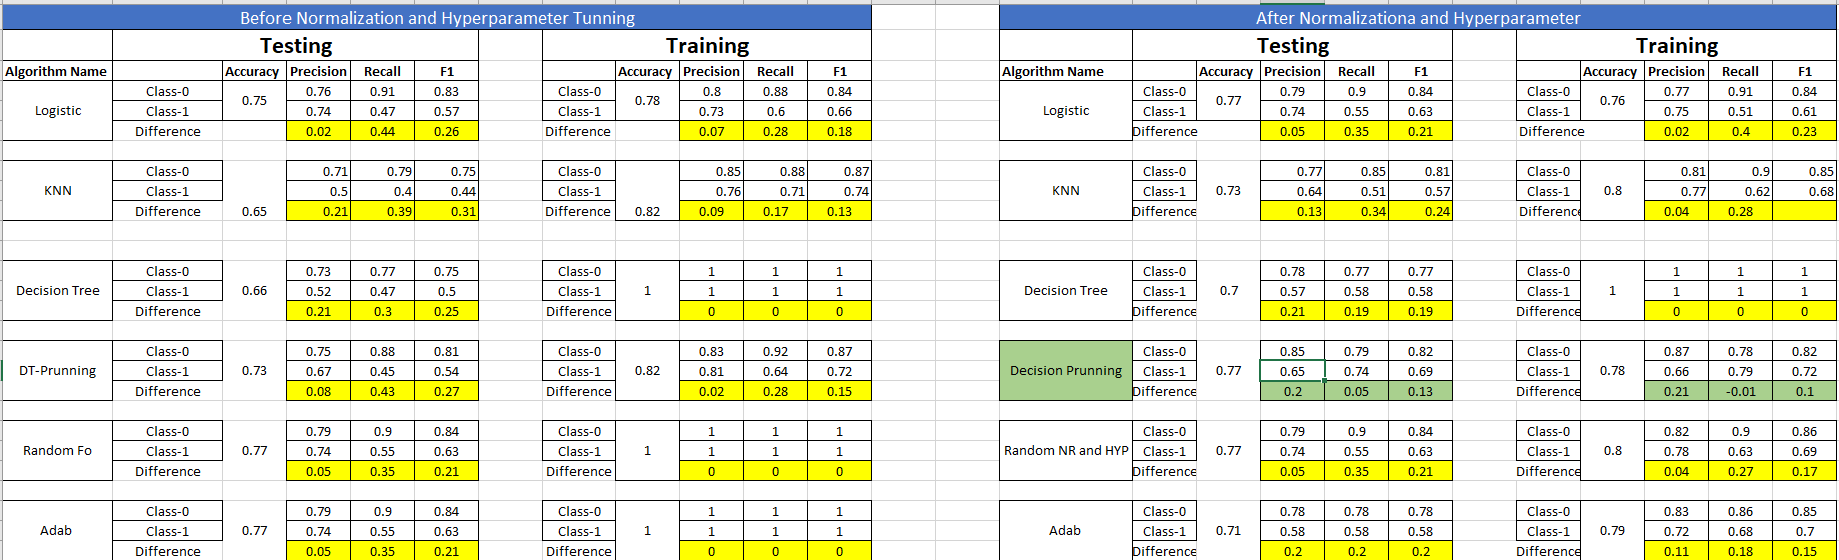

In [95]:
df.head(1).T

,0
Glucose,148.000
BloodPressure,50.000
SkinThickness,35.000
Insulin,0.000
BMI,33.600
DiabetesPedigreeFunction,0.627
Age,50.000
Outcome,1.000


In [96]:
Glucose=148.000
BloodPressure=50.000
SkinThickness=35.000
Insulin=0.000
BMI=33.600
DiabetesPedigreeFunction=0.627
Age=50.000

In [97]:
column_names=x.columns
column_names

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [98]:
test_array=np.zeros(len(x.columns))
test_array

array([0., 0., 0., 0., 0., 0., 0.])

In [99]:
test_array[0]=Glucose
test_array[1]=BloodPressure
test_array[2]=SkinThickness
test_array[3]=Insulin
test_array[4]=BMI
test_array[5]=DiabetesPedigreeFunction
test_array[6]=Age

In [100]:
np.around(decision_tree_model.predict([test_array])[0])

1

In [101]:
import pickle
import json

with open("decision_tree.pkl","wb") as f:
    pickle.dump(decision_tree_model,f)

In [102]:
project_data={"column_names":['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age']}

In [103]:
with open("project_json.json","w") as f:
    json.dump(project_data, f)